In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

READ THIS: https://mljar.com/blog/feature-importance-in-random-forest/
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [2]:
df = pd.read_csv(r'C:\Users\win10\Downloads\Data Order1.csv', index_col=[0])

In [3]:
#pilih kolom dengan numerik data 
#Created by Aadika45

num_col = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype =='float64':
        num_col.append(i)
    else:
        pass
num_col = list(set(num_col) - set(['Order Id', 'Category Id', 'Customer Id', 'Product Category Id', 
'Year', 'New_late_delivery_risk','Latitude','Longitude','Product Card Id', 'New_Day_Shipment',
'Department Id','Order Profit Per Order','Order Customer Id','Late_delivery_risk','Order Item Id']))

In [4]:
#X merupakan variabel independet dan y variabel dependen
X = df[num_col]
y = df['Late_delivery_risk']

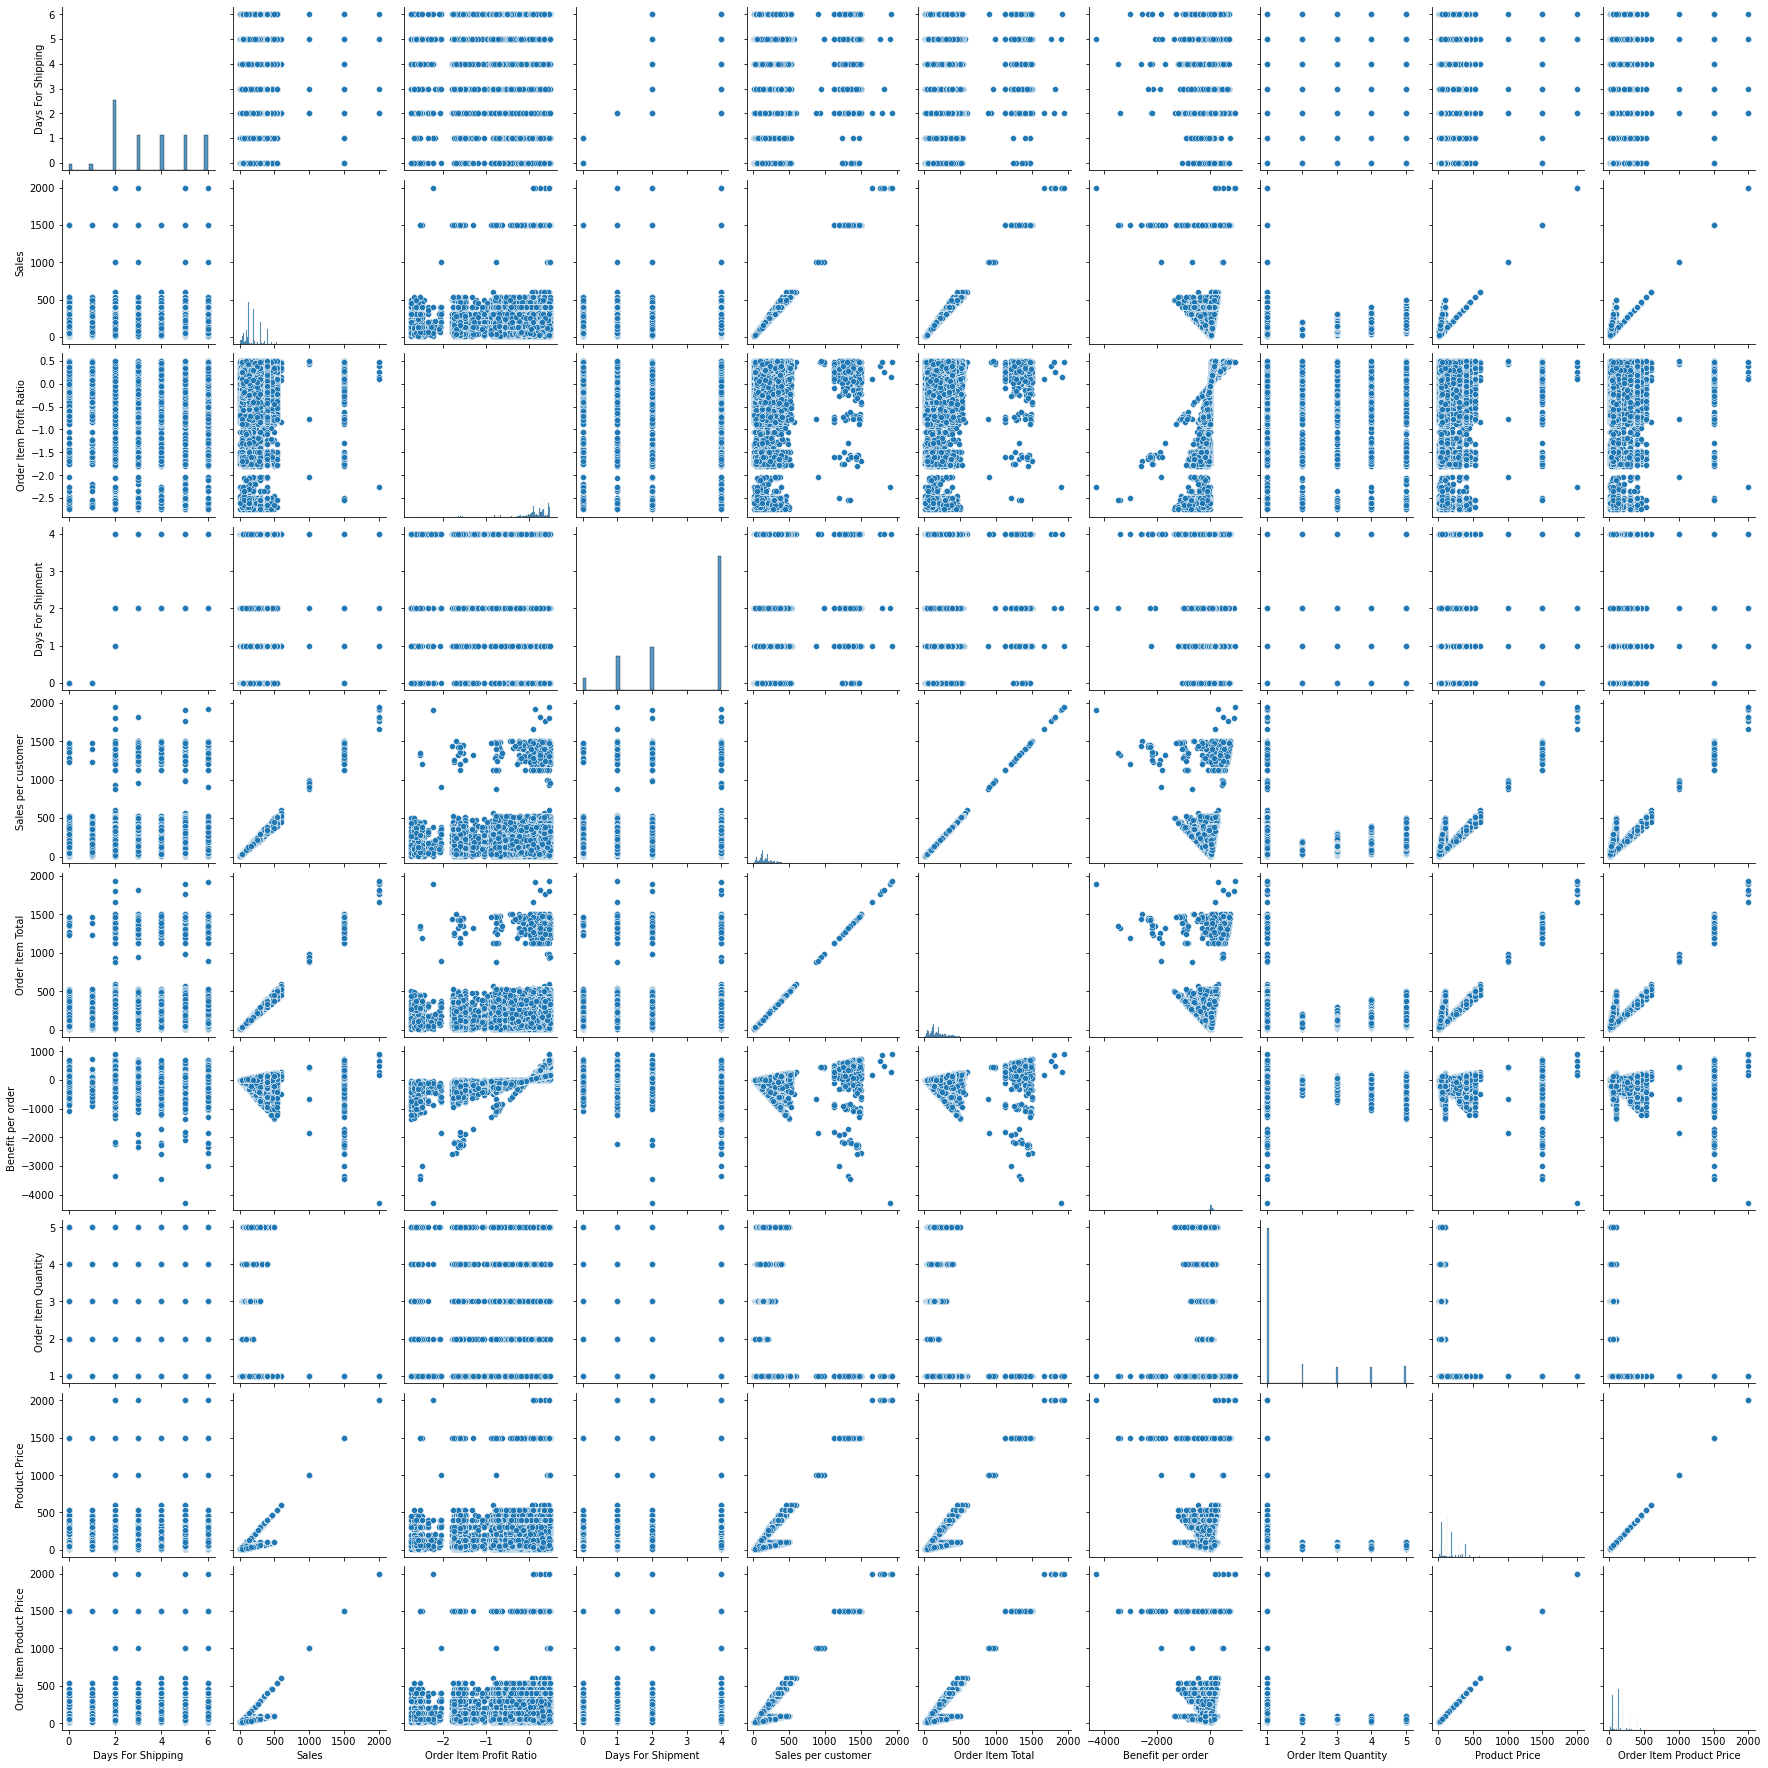

In [5]:
#kita lihat sebaran data dari setiap kolom
sns.pairplot(X)

In [6]:
#import libraries yang dibutuhkan
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=500)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [8]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
prediction = dtc.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[ 8512   453]
 [  566 10195]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8965
           1       0.96      0.95      0.95     10761

    accuracy                           0.95     19726
   macro avg       0.95      0.95      0.95     19726
weighted avg       0.95      0.95      0.95     19726

0.9483422893642908


feature importance is one of features in random forrest tools to find best variable in dataframe to predict the target of model.
check out this video: https://www.youtube.com/watch?v=P7zhaJmqf3g

for feature importance, it is need that we transform the categorical data (string/object dtype) into numerical value. In this case
we don't have numerical data since at the beginning we only chose numerical data type.

In [11]:
X.columns

Index(['Days For Shipping', 'Sales', 'Order Item Profit Ratio',
       'Days For Shipment', 'Sales per customer', 'Order Item Total',
       'Benefit per order', 'Order Item Quantity', 'Product Price',
       'Order Item Product Price'],
      dtype='object')

In [12]:
#versi final project
importance_func1 = dtc.feature_importances_.argsort()
importance_variable = pd.DataFrame({'feature':X.columns[importance_func1],'importance':dtc.feature_importances_[importance_func1]})
importance_variable.sort_values(by='importance', ascending= False)

,feature,importance
9,Days For Shipping,0.487694
8,Days For Shipment,0.431391
7,Benefit per order,0.035953
6,Order Item Profit Ratio,0.016154
5,Order Item Total,0.011318
4,Sales per customer,0.009921
3,Sales,0.003086
2,Product Price,0.002105
1,Order Item Product Price,0.001797
0,Order Item Quantity,0.000582


In [13]:
importance_variable2 = pd.DataFrame(dtc.feature_importances_, index = X_train.columns, columns= ['Importance'])
importance_variable2.sort_values(by='Importance', ascending=False)

,Importance
Days For Shipping,0.487694
Days For Shipment,0.431391
Benefit per order,0.035953
Order Item Profit Ratio,0.016154
Order Item Total,0.011318
Sales per customer,0.009921
Sales,0.003086
Product Price,0.002105
Order Item Product Price,0.001797
Order Item Quantity,0.000582


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 3000)

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3000)

In [16]:
rfc_prediction = rfc.predict(X_test)

In [17]:
print(confusion_matrix(y_test,rfc_prediction))
print(classification_report(y_test, rfc_prediction))
print('accuracy_score =',accuracy_score(y_test,rfc_prediction))

[[ 8487   478]
 [   91 10670]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8965
           1       0.96      0.99      0.97     10761

    accuracy                           0.97     19726
   macro avg       0.97      0.97      0.97     19726
weighted avg       0.97      0.97      0.97     19726

accuracy_score = 0.9711548210483626


In [18]:
#versi video di link di atas
importance_variable1 = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns= ['Importance'])
importance_variable1.sort_values(by='Importance', ascending=False)


,Importance
Days For Shipping,0.525925
Days For Shipment,0.373882
Benefit per order,0.033035
Order Item Profit Ratio,0.022904
Sales per customer,0.015982
Order Item Total,0.015961
Sales,0.004005
Product Price,0.003281
Order Item Product Price,0.003267
Order Item Quantity,0.001758


In [19]:
funct1 = rfc.feature_importances_.argsort()
importance_variable13 = pd.DataFrame(rfc.feature_importances_[funct1], index = X_train.columns[funct1 ], columns= ['Importance'])
importance_variable13.sort_values(by='Importance', ascending=False)


,Importance
Days For Shipping,0.525925
Days For Shipment,0.373882
Benefit per order,0.033035
Order Item Profit Ratio,0.022904
Sales per customer,0.015982
Order Item Total,0.015961
Sales,0.004005
Product Price,0.003281
Order Item Product Price,0.003267
Order Item Quantity,0.001758


forrest classifier lebih bagus dari pada tree classifier